In [18]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

In [19]:
from scipy import signal
def denoise(y):
    D_noise = librosa.stft(y)
    D_denoise = signal.wiener(D_noise)
    y_denoised = librosa.istft(D_denoise)
    return y_denoised

In [23]:
x, sr = librosa.load('ZOOM0007.WAV')

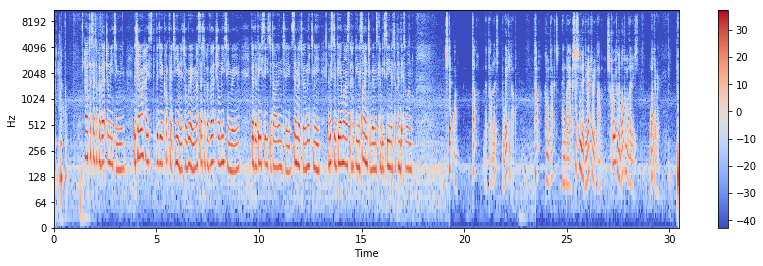

In [24]:
S = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [22]:

librosa.output.write_wav('outwiener.wav', denoise(x), sr) # sounds like a wiener indeed.next.

In [1]:
from pysndfx import AudioEffectsChain
import numpy as np
import math
import python_speech_features
import scipy as sp
from scipy import signal


'''------------------------------------
NOISE REDUCTION USING MEDIAN:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''

def reduce_noise_median(y, sr):
    y = sp.signal.medfilt(y,3)
    return (y)  


'''------------------------------------
NOISE REDUCTION USING POWER:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''


def reduce_noise_power(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = round(np.median(cent))*1.5
    threshold_l = round(np.median(cent))*0.1

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.8).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5)#.limiter(gain=6.0)
    y_clean = less_noise(y)

    return y_clean


'''------------------------------------
NOISE REDUCTION USING CENTROID ANALYSIS:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''

def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

def reduce_noise_centroid_mb(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.5).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5).limiter(gain=10.0)
    # less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
    y_cleaned = less_noise(y)
    cent_cleaned = librosa.feature.spectral_centroid(y=y_cleaned, sr=sr)
    columns, rows = cent_cleaned.shape
    boost_h = math.floor(rows/3*2)
    boost_l = math.floor(rows/6)
    boost = math.floor(rows/3)

    # boost_bass = AudioEffectsChain().lowshelf(gain=20.0, frequency=boost, slope=0.8)
    boost_bass = AudioEffectsChain().lowshelf(gain=16.0, frequency=boost_h, slope=0.5)#.lowshelf(gain=-20.0, frequency=boost_l, slope=0.8)
    y_clean_boosted = boost_bass(y_cleaned)

    return y_clean_boosted
    
'''------------------------------------
OUTPUT GENERATOR:
    receives a destination path, file name, audio matrix, and sample rate,
    generates a wav file based on input
------------------------------------'''
def output_file(destination ,filename, y, sr, ext=""):
    destination = destination + filename[:-4] + ext + '.wav'
    librosa.output.write_wav(destination, y, sr)   
    


['/home/bigdata/scripts/pyASR/waveletdenoiser']

In [33]:
samples = ['ZOOM0007.WAV']
for s in samples:
    # reading a file
    filename = s
    y, sr = librosa.load(filename)

    # reducing noise using db power
    y_reduced_power = reduce_noise_power(y, sr)
    y_reduced_centroid_s = reduce_noise_centroid_s(y, sr)
    y_reduced_centroid_mb = reduce_noise_centroid_mb(y, sr)
    y_reduced_median = reduce_noise_median(y, sr)
    librosa.output.write_wav('out_pwr.wav', y_reduced_power, sr)
    librosa.output.write_wav('out_ctr_s.wav', y_reduced_centroid_s, sr)
    librosa.output.write_wav('out_ctr_mb.wav', y_reduced_centroid_mb, sr)
    librosa.output.write_wav('out_median.wav', y_reduced_median, sr)
    
    
    

  
    


In [42]:
def loadplotwav(filename):
    y, sr = librosa.load(filename)
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))
    plt.figure(figsize=(14, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.title(filename)
    plt.show()

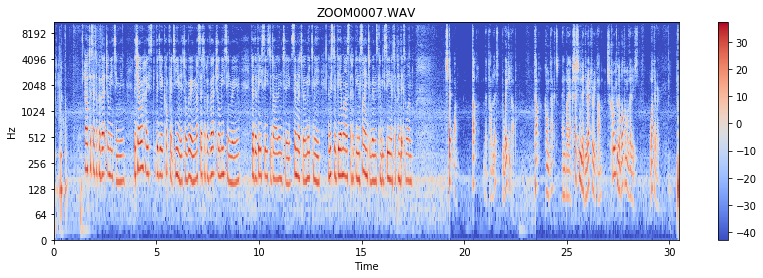

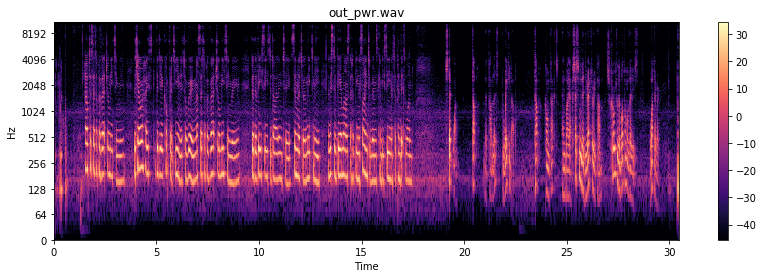

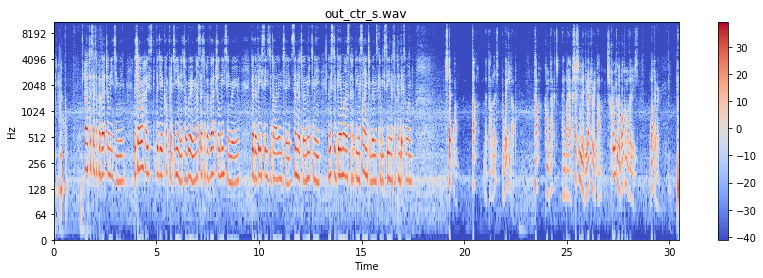

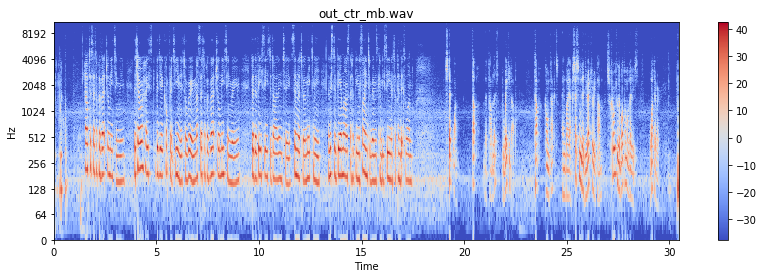

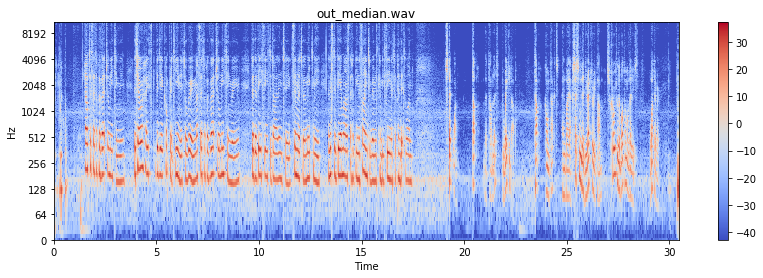

In [43]:
listofrecordings=['ZOOM0007.WAV','out_pwr.wav','out_ctr_s.wav','out_ctr_mb.wav','out_median.wav']

for rec in listofrecordings:
    loadplotwav(rec)

In [1]:
import waveletdenoiser
